# E-Commerce Sales Analysis

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
# Load Data
df = pd.read_csv("datasets/Ecommerce Data.csv", parse_dates=["Order Date"], dayfirst=True)

## Data Exploration

In [3]:
df.head()

,Additional Order items,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Segment,Customer State,Customer Zipcode,Market,Order Customer Id,Order Date,Order Id,Order Region,Order Item Total,Order Quantity,Product Price,Profit Margin,Profit Per Order,Sales
0,Camping & Hiking,Camping & Hiking,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,LATAM,568,2017-06-17,61558,South America,269.980011,1,299.980011,26.10%,78.290001,800.000000
1,Camping & Hiking,Camping & Hiking,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725.0,LATAM,3341,2017-04-18,57472,South America,269.980011,1,299.980011,-5.40%,-16.200001,800.000000
2,Camping & Hiking,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0,LATAM,7459,2017-05-24,59898,Central America,263.980011,1,299.980011,3.90%,11.620000,800.000000
3,Camping & Hiking,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0,LATAM,7459,2017-05-24,59898,Central America,260.980011,1,299.980011,-1.10%,-3.390000,800.000000
4,Hunting & Shooting,Hunting & Shooting,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725.0,LATAM,10740,2017-06-05,58644,Central America,130.490005,1,149.990005,-63.80%,-95.650002,149.990005


In [4]:
df.shape

(115746, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115746 entries, 0 to 115745
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Additional Order items  114722 non-null  object        
 1   Category Name           115746 non-null  object        
 2   Customer City           115746 non-null  object        
 3   Customer Country        115746 non-null  object        
 4   Customer Fname          115746 non-null  object        
 5   Customer Id             115746 non-null  int64         
 6   Customer Segment        115746 non-null  object        
 7   Customer State          115746 non-null  object        
 8   Customer Zipcode        115743 non-null  float64       
 9   Market                  115746 non-null  object        
 10  Order Customer Id       115746 non-null  int64         
 11  Order Date              115746 non-null  datetime64[ns]
 12  Order Id                115746

In [6]:
df.describe()

,Customer Id,Customer Zipcode,Order Customer Id,Order Date,Order Id,Order Item Total,Order Quantity,Product Price,Profit Per Order,Sales
count,115746.000000,115743.000000,115746.000000,115746,115746.000000,115746.000000,115746.000000,115746.000000,115746.000000,115746.000000
mean,6714.510506,36031.651158,6714.510506,2016-12-09 13:19:26.160386048,48314.658243,187.193568,2.551535,146.499821,22.585698,237.959730
min,2.000000,603.000000,2.000000,2016-01-01 00:00:00,25005.000000,7.490000,1.000000,9.990000,-4274.979980,9.990000
25%,3291.000000,725.000000,3291.000000,2016-06-19 00:00:00,36696.000000,106.589996,1.000000,50.000000,7.200000,129.990005
50%,6507.000000,19380.000000,6507.000000,2016-12-04 00:00:00,48195.000000,165.990005,2.000000,99.989998,32.040001,199.949997
75%,9874.000000,78223.000000,9874.000000,2017-05-29 00:00:00,59728.000000,248.979996,4.000000,199.990005,65.727503,299.980011
max,18634.000000,99205.000000,18634.000000,2017-12-31 00:00:00,75081.000000,1939.989990,5.000000,1999.989990,911.799988,1999.989990
std,4096.926311,37585.060790,4096.926311,NaN,13532.737160,128.775391,1.683874,150.401535,108.636460,194.407483


In [7]:
# checking missing values
df.isna().sum()

Additional Order items    1024
Category Name                0
Customer City                0
Customer Country             0
Customer Fname               0
Customer Id                  0
Customer Segment             0
Customer State               0
Customer Zipcode             3
Market                       0
Order Customer Id            0
Order Date                   0
Order Id                     0
Order Region                 0
Order Item Total             0
Order Quantity               0
Product Price                0
Profit Margin                0
Profit Per Order             0
Sales                        0
dtype: int64

In [8]:
# checking for duplicate values
df.duplicated().sum()

0

In [9]:
# dropping unnecessary column
df.drop("Additional Order items", axis=1, inplace=True)
df.drop("Order Customer Id", axis=1, inplace=True)

In [10]:
df.columns

Index(['Category Name', 'Customer City', 'Customer Country', 'Customer Fname',
       'Customer Id', 'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Market', 'Order Date', 'Order Id', 'Order Region', 'Order Item Total',
       'Order Quantity', 'Product Price', 'Profit Margin', 'Profit Per Order',
       'Sales'],
      dtype='object')

In [11]:
# Renaming columns
df = df.rename(
   { "Category Name": "Category_Name",
    "Customer City": "Customer_City",
    "Customer Country": "Customer_Country",
    "Customer Fname": "Customer_Fname",
    "Customer Id": "CustomerID",
    "Customer Segment": "Customer_Segment",
    "Customer State": "Customer_State",
    "Customer Zipcode": "Customer_Zipcode",
    "Order Date": "Order_Date",
    "Order Id": "OrderID",
    "Order Region": "Order_Region",
    "Order Item Total": "Order_Item_Total",
    "Order Quantity": "Order_Quantity",
    "Product Price": "Product_Price",
    "Profit Margin": "Profit_Margin",
    "Profit Per Order": "Profit_Per_Order"
   }, axis=1
)

## Exploratory Analysis

In [12]:
# Total Revenue
total_revenue = df["Sales"].sum()
print(f"Total Revenue: ${total_revenue.round(2)}")

Total Revenue: $27542886.86


In [13]:
# Revenue by Year
(df
 .set_index("Order_Date")
 .resample("YE")
 .agg(
     revenue_millions=("Sales", "sum")
 )
 /1000000 # to convert to millions
)

,revenue_millions
Order_Date,
2016-12-31,13.433162
2017-12-31,14.109725


In [14]:
# Revenue percentage change
(df
 .set_index("Order_Date")
 .resample("YE")
 .agg(
     pct_change=("Sales", "sum")
 )
 .pct_change() * 100 # calculate % change
)

,pct_change
Order_Date,
2016-12-31,NaN
2017-12-31,5.036519


In [15]:
# Profit per order by year
(df
 .set_index("Order_Date")
 .resample("YE")
 .agg(
     profit_millions=("Profit_Per_Order", "sum")
 )
 /1000000
)

,profit_millions
Order_Date,
2016-12-31,1.310119
2017-12-31,1.304085


In [16]:
# Profit per order Percentage change
(df
 .set_index("Order_Date")
 .resample("YE")
 .agg(
     pct_change=("Profit_Per_Order", "sum")
 )
 .pct_change() * 100
)

,pct_change
Order_Date,
2016-12-31,NaN
2017-12-31,-0.460566


In [17]:
# Number of orders by year
(df
 .set_index("Order_Date")
 .resample("YE")
 .agg(
     orders=("Order_Quantity", "sum")
 )
)

,orders
Order_Date,
2016-12-31,137352
2017-12-31,157978


In [18]:
# Number of orders percentage change
(df
 .set_index("Order_Date")
 .resample("YE")
 .agg(
     orders=("Order_Quantity", "sum")
 )
 .pct_change() * 100
)

,orders
Order_Date,
2016-12-31,NaN
2017-12-31,15.016891


In [19]:
# Market Share in millions
market_share = (df
 .groupby("Market")
 .agg(
    sales=("Sales", "sum")
 )
)

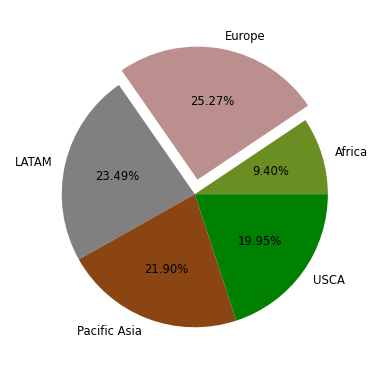

In [20]:
fig, ax = plt.subplots()
explode = (0, 0.1, 0, 0, 0)
ax.pie(
    market_share["sales"], 
    labels=market_share.index, 
    autopct="%1.2f%%",
    colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown', 'green'],
    explode=explode,
    textprops={'size': 'smaller'}, radius=0.9
);

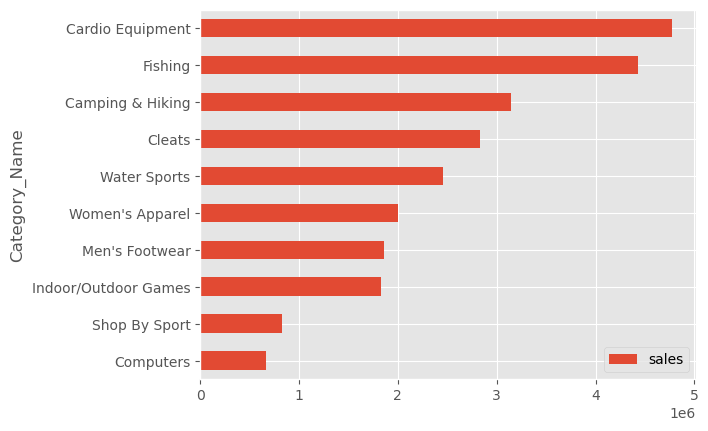

In [21]:
# Category-wise sales
(df
 .set_index("Order_Date")
 .groupby("Category_Name")
 # .resample("YE", include_groups=False)
 .agg(
     sales=("Sales", "sum")
 )
 .sort_values("sales", ascending=False)[:10]
 .sort_values("sales")
).plot.barh();